In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Read the data
data = pd.read_csv("/content/train.csv")
xTest= pd.read_csv("/content/test.csv")

xTrain = data.drop(["Survived"], axis=1)
yTrain = np.array(data.Survived)

#Let's take a look at the data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#First save the "PassengerId" column for the submission file
passengerId = xTest.PassengerId

#We can eliminate the column "name" and "PassengerId" columns because they have no mutual information.
xTrain.drop(columns=["Name", "PassengerId"], axis=1, inplace=True)
xTest.drop(columns=["Name", "PassengerId"], axis=1, inplace=True)

In [ ]:
#Let's look how many unique values has the 'Ticket' column
print("Unique values in the ticket column from the data: ", len(xTrain["Ticket"].unique()))
print("Unique values in the ticket column from the data: ", len(xTest["Ticket"].unique()))

Unique values in the ticket column from the data:  681
Unique values in the ticket column from the data:  363


It seems too many values to do the *One Hot Encoding*, so I will just drop them


In [ ]:
xTrain.drop(columns=["Ticket"], axis=1, inplace=True)
xTest.drop(columns=["Ticket"], axis=1, inplace=True)

In [ ]:
#Now with the 'Cabin' column.
print("Unique values in the 'Cabin' column from the data: ", len(xTrain["Cabin"].unique()))
print("Unique values in the 'Cabin' column from the data: ", len(xTest["Cabin"].unique()))

Unique values in the 'Cabin' column from the data:  148
Unique values in the 'Cabin' column from the data:  77


In [ ]:
#There are also too many unique values in those columns, let's drop them too
xTrain.drop(columns=["Cabin"], axis=1, inplace=True)
xTest.drop(columns=["Cabin"], axis=1, inplace=True)

In [ ]:
#Now with the 'Embarked' column.
print("Unique values in the 'Cabin' column from the data: ", len(xTrain["Embarked"].unique()))
print("Unique values in the 'Cabin' column from the data: ", len(xTest["Embarked"].unique()))

Unique values in the 'Cabin' column from the data:  4
Unique values in the 'Cabin' column from the data:  3


We can do the *One Hot* with the 'Embarked' columns because they have only 4 and 3 unique values. It won't be any problem to handle them.

Now let's see how many *Null* values we have to treat them.

In [ ]:
xTrain.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
xTest.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
#Starting with the "Age", "Embarked" and "Fare" columns let's impute the values with the mode and median from each of them.
xTrain["Age"] = xTrain["Age"].fillna(xTrain["Age"].median())
xTest["Age"] = xTest["Age"].fillna(xTest["Age"].median())
xTrain["Embarked"] = xTrain["Embarked"].fillna(xTrain["Embarked"].mode()[0])
xTest["Embarked"] = xTest["Embarked"].fillna(xTest["Embarked"].mode()[0])
xTrain["Fare"] = xTrain["Fare"].fillna(xTrain["Fare"].median())
xTest["Fare"] = xTest["Fare"].fillna(xTest["Fare"].median())

#Let's do the One Hot with the "Embarked" and "Sex" column
categoricalCols=["Sex", "Embarked"]
xTrain = pd.get_dummies(xTrain, columns=categoricalCols, drop_first=True, dtype=int)
xTest = pd.get_dummies(xTest, columns=categoricalCols, drop_first=True, dtype=int)

xTrain.astype('int64')
xTest.astype('int64')
print(xTrain)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500         1           0           1
1         1  38.0      1      0  71.2833         0           0           0
2         3  26.0      0      0   7.9250         0           0           1
3         1  35.0      1      0  53.1000         0           0           1
4         3  35.0      0      0   8.0500         1           0           1
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000         1           0           1
887       1  19.0      0      0  30.0000         0           0           1
888       3  28.0      1      2  23.4500         0           0           1
889       1  26.0      0      0  30.0000         1           0           0
890       3  32.0      0      0   7.7500         1           1           0

[891 rows x 8 columns]


Now that we don't have null values, and we handled the Categorical columns. Let's start making the model.

Modelo entrenado correctamente


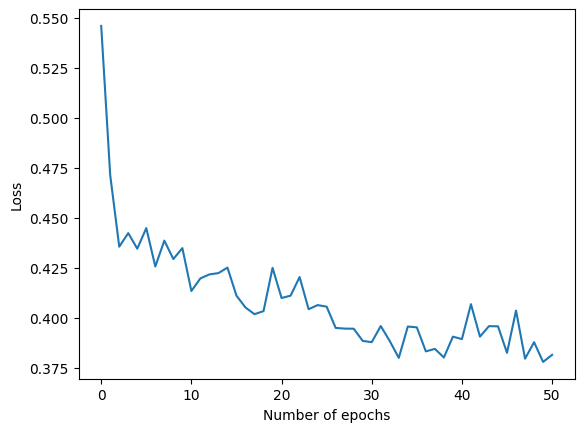

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[xTrain.shape[1]]), # Capa de entrada definida correctamente
    tf.keras.layers.BatchNormalization(),  # Capa de normalización
    tf.keras.layers.Dense(32, activation='relu'),  # Capa oculta
    tf.keras.layers.Dense(64, activation='relu'),  # Capa oculta
    tf.keras.layers.Dense(1, activation='sigmoid'),  # Capa de salida
])

modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0025),
               loss='binary_crossentropy',
               metrics=["accuracy"])

#Creamos el earlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    min_delta=0.0001
)

history = modelo.fit(
    xTrain, yTrain,
    epochs=80,
    validation_split=0.2,  # Divide en train/validation
    batch_size=16,
    verbose=0,
    callbacks=[early_stopping]
)

print("Modelo entrenado correctamente")

plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [43]:
#Make the predictions
print(np.array(xTest).shape)
prediccion = modelo.predict(np.array(xTest))

#Convert the probability (from 0 to 1) into binary result (0 or 1)
prediccion = np.array([1 if x > 0.5 else 0 for x in prediccion])

#Concat the passenger id and the prediction into a single dataframe
prediccionDf = pd.DataFrame({'PassengerId': passengerId, 'Survived':prediccion})

#Convert it into a csv file so we can submit it
prediccionDf.to_csv('gender_submission.csv', index=False, sep=',')

#Let's print it
submission = pd.read_csv('/content/gender_submission.csv')
display(submission.head())

(418, 12)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
